# In what level does inheritance affect the capital distribution of a population?
## Find out with the help of Python


### Project summary

I theorized that the biggest reason this happened is cause of "old-money". This means that people that have accumulated wealth over the years can pass it over to their children and make heavy investments in their future, subsidizing in the process the future opportunities of those that are not this fortunate. If you look around you (in your university circles or the internet), you can notice that those that are educated in the greatest universities come from families with established wealth. This is mostly due to the fact that colleges have adopted business model and prefer money over bright students (or prefer money more than a poor bright kid, I am not implying that wealthy kids are not smart). This increases the opportunities of wealthy families keeping their wealth in the future while decreasing the opportunities of poorer families to get richer and "make it".

For this reason, I created a model based on real world data that simulates a N people population each having a set of characteristics and then i did what computers do best and simulated this population through time to see if inequality will change if we let people inherit the money of their parents. Inheritance has a lot more to do with the money one's parents have while they are alive and lot less while they are dead but in this way we can still get notable results while still staying true to the reality.

### Footnote

The results of both the model and the simulation follow in the lines of code below. I have to be clear that this project was made for fun and for me to try to test my Python, statistics and R skills while finding out something I was really curious about. For this reason, I INSIST that you do take what is described with a big grain of salt as it is only a model of society and does not try to replicate every single aspect of reality. In the future I hope I improve on both the model and the simulation, adding more features and making it as close to reality as I can.


# Person stats model
## Creating a python module with functions that statistically calculate the following variables of a person

**Sex,
Age,
Social Class,
Income,
Marital Status,
Capital,
Children Status
**

To achieve this I used **object-oriented programming** to create a **Population** comprised of objects of the class **Person**.

The python code for this class is given in the following cell. While in the one below it I describe the attributes and methods used in it.

In [4]:
class Person:
	def __init__(self,gender, social_class, age, income, capital, marital_status):
		global id_count

		self.id = id_count
		self.social_class = social_class
		self.gender = gender
		self.age = age
		self.income = income
		self.husband_wife = 0
		self.children_id = []
		self.mother_id = 0
		self.father_id = 0
		self.children_status = 0
		self.marital_status = marital_status
		self.capital = capital
		id_count += 1

	def get_married(self, id):
		self.marital_status = 1
		self.husband_wife = id

	def assign_child(self, id):
		self.children_status = 1
		self.children_id.append(id)

	def assign_parents(self, father_id, mother_id):
		self.father_id = father_id
		self.mother_id = mother_id

	def set_social_class(self, new_class):
		self.social_class = new_class

	#def update_income(self):
		                
        
	def update_capital(self,costs):
		self.capital += self.income
		self.capital -= costs

	def increment_age(self, increment):
		self.age += increment

	def pass_capital(self, cap, siblings):
		self.capital += (cap/siblings)

	def __repr__(self):
		return "<Person ID:%s, Gender:%s, Social Class:%s, Age:%s, Income:%s, Capital:%s, Husband/Wife ID:%s Children: %s Father: %s Mother: %s>" % (self.id, self.gender,
		self.social_class, self.age, self.income,self.capital, self.husband_wife, self.children_id, self.father_id, self.mother_id)



<table style="margin:auto;width: 595px; height: 455px;">
<tbody>
<tr style="background: lightgrey;">
<td style="width: 156px;"><strong>Variable Name</strong></td>
<td style="width: 423px; text-align: left;"><strong>Description</strong></td>
</tr>
<tr>
<td style="width: 156px;"><strong>ID</strong></td>
<td style="width: 423px; text-align: left;">
<p>An identification number that distinguishes<br />one object instance from another.</p>
</td>
</tr>
<tr>
<td style="width: 156px;"><strong>Gender</strong></td>
<td style="width: 423px; text-align: left;">
<p>The person's gender, can be male or female.</p>
</td>
</tr>
<tr>
<td style="width: 156px;"><strong>Age</strong></td>
<td style="width: 423px; text-align: left;">
<p>The person's age is an integer in [0,100]</p>
</td>
</tr>
<tr>
<td style="width: 156px;"><strong>Social Class</strong></td>
<td style="width: 423px; text-align: left;">
<p>The person's social class is an integer in [1,5].&nbsp;<br />The social classes are based in William Johnson's and <br />Joseph Hickey's 2005 model for social classes. <sup>1</sup></p>
<p>Concretely, we have 5 classes.</p>
<ol>
<li><strong>The Lower Class</strong> (20%)</li>
<li><strong>The Working Class</strong> (32%)</li>
<li><strong>The Lower Middle Class</strong> (32%)</li>
<li><strong>The Upper Middle Class</strong> (15%)</li>
<li><strong>The Upper Class</strong> (1%)</li>
</ol>
<p>&nbsp;</p>
</td>
</tr>
<tr>
<td style="width: 156px;"><strong>Income</strong></td>
<td style="width: 423px; text-align: left;">
<p>The yearly income of a person, which depends on his age and gender (Figure 1) and his social class (Figures 2-6). As we can see in Figure 1 the income to age distribution follows a normal Gaussian distribution, which means that a person's income is on it's highest when he is middle aged. Moreover we can see from the data that women's income is lower than that of men. 
<p>The data used to create the income distribution's was provided by <a href="https://www.ipums.org">IPUMS</a> and the tidying of the data was done in R.&nbsp;</p>
<p>Specifically, I fitted the data in 5 different distributions&nbsp;<strong>(Figures 2-6),</strong> one for each social class.</p>
</td>
</tr>
<tr>
<td style="width: 156px;"><strong>Capital</strong></td>
<td style="width: 423px; text-align: left;">
<p>The capital accumulated by each person. It depends on the income and the age of each person. More can be found about the heuristic used, in Charles Farell's book: "<em>Your Money Ratios: 8 Simple Tools for Financial Security" <sup>2</sup></em></p>
<p>&nbsp;</p>
</td>
</tr>
<tr>
<td style="width: 156px;"><strong>Husband_wife</strong></td>
<td style="width: 423px; text-align: left;">Variable that contains the id of the spouse of the individual.</td>
</tr>
<tr>
<td style="width: 156px;"><strong>Children_id</strong></td>
<td style="width: 423px; text-align: left;">List that contains the ids of the children of the individual.</td>
</tr>
<tr>
<td style="width: 156px;"><strong>Mother_id</strong></td>
<td style="width: 423px; text-align: left;">Id of mother.</td>
</tr>
<tr>
<td style="width: 156px;"><strong>Father_id</strong></td>
<td style="width: 423px; text-align: left;">Id of father.</td>
</tr>
<tr>
<td style="width: 156px;"><strong>Children_status</strong></td>
<td style="width: 423px; text-align: left;">Whether or not the person has a child or more.</td>
</tr>
<tr>
<td style="width: 156px;"><strong>Marital_status</strong></td>
<td style="width: 423px; text-align: left;">Whether or not the person is married.</td>
</tr>
</tbody>
</table>
<p>&nbsp;</p>
<table style="margin:auto;height: 5px; width: 595px;">
<tbody>
<tr style="background: lightgrey; height: 18px;">
<td style="width: 156px; height: 18px;"><strong>Procedure Name</strong></td>
<td style="width: 423px; height: 18px; text-align: left;"><strong>Description</strong></td>
</tr>
<tr style="height: 18px;">
<td style="width: 156px; height: 18px;"><strong>set_social_class(new_class)&nbsp;</strong></td>
<td style="width: 423px; height: 18px; text-align: left;">&nbsp;Assigns new class to the individual.</td>
</tr>
<tr style="height: 36px;">
<td style="width: 156px; height: 36px;"><strong>get_married(id)</strong></td>
<td style="width: 423px; height: 36px; text-align: left;">Sets spouse of individual to ID and marital_status to 1.</td>
</tr>
<tr style="height: 36px;">
<td style="width: 156px; height: 36px;"><strong>assign_child(id)</strong></td>
<td style="width: 423px; height: 36px; text-align: left;">Sets children_status to 1 and appends id to children_id list.</td>
</tr>
<tr style="height: 37px;">
<td style="width: 156px; height: 37px;"><strong>assign_parents(father_id, mother_id)</strong></td>
<td style="width: 423px; height: 37px; text-align: left;">Sets the parents' ids.</td>
</tr>
<tr style="height: 18px;">
<td style="width: 156px; height: 18px;"><strong>increment_age(increment)</strong></td>
<td style="width: 423px; height: 18px; text-align: left;">Increments age by a number.</td>
</tr>
<tr style="height: 18px;">
<td style="width: 156px; height: 18px;"><strong>update_capital(cap, siblings)</strong></td>
<td style="width: 423px; height: 18px; text-align: left;">Updates a person's capital after his/her parent has died. It adds it to the existing one after dividing it by the number of children in the family.</td>
</tr>
</tbody>
</table>
<div>



### Gender

First, to create a person we need to make it a he or she. So we will be taking a random binary probability of the **sex** being 0 for males and 1 for females.

In [6]:
import numpy as np
np.random.seed(1)
gender = np.random.randint(2)
gender

1

### Age
Next we will define that person's **age** based on his/her gender and according to the UN's data (http://data.un.org/Data.aspx?d=POP&f=tableCode%3A22)

The age data follows this dataframe:

In [7]:
import pandas as pd
ages = pd.read_csv("data/ages.csv")
ages_df = pd.DataFrame(ages)
ages_df

,Country or Area,Year,Area,Sex,Age,Record Type,Reliability,Source Year,Value,Value Footnotes
0,United States of America,2015,Total,Both Sexes,Total,Estimate - de jure,"Final figure, complete",2016.0,321418820.0,"1,2"
1,United States of America,2015,Total,Both Sexes,0,Estimate - de jure,"Final figure, complete",2016.0,3978038.0,"1,2"
2,United States of America,2015,Total,Both Sexes,0 - 4,Estimate - de jure,"Final figure, complete",2016.0,19907281.0,"1,2"
3,United States of America,2015,Total,Both Sexes,1,Estimate - de jure,"Final figure, complete",2016.0,3968564.0,"1,2"
4,United States of America,2015,Total,Both Sexes,1 - 4,Estimate - de jure,"Final figure, complete",2016.0,15929243.0,"1,2"
5,United States of America,2015,Total,Both Sexes,2,Estimate - de jure,"Final figure, complete",2016.0,3966583.0,"1,2"
6,United States of America,2015,Total,Both Sexes,3,Estimate - de jure,"Final figure, complete",2016.0,3974061.0,"1,2"
7,United States of America,2015,Total,Both Sexes,4,Estimate - de jure,"Final figure, complete",2016.0,4020035.0,"1,2"
8,United States of America,2015,Total,Both Sexes,5,Estimate - de jure,"Final figure, complete",2016.0,4018158.0,"1,2"
9,United States of America,2015,Total,Both Sexes,5 - 9,Estimate - de jure,"Final figure, complete",2016.0,20487176.0,"1,2"


The Age column contains data in bins of 5, but in the **get_age_percents()** function, we convert the bins to bins of 5 and then calculate the **probability density function** of the data manually.  

In [8]:

def get_age_percents():
	ages = pd.read_csv("data/ages.csv")
	ages_df = pd.DataFrame(ages)
	starting_columns = ["Total", "0 - 4", "5 - 9", "10 - 14", "15 - 19", "20 - 24", "25 - 29", "30 - 34", "35 - 39", "40 - 44", "45 - 49"
	, "50 - 54", "55 - 59", "60 - 64", "65 - 69", "70 - 74", "75 - 79", "80 - 84", "85 - 89", "90 - 94", "95 - 99", "100 +"]
	final_columns = ["Total", "0 - 9", "10 - 19", "20 - 29", "30 - 39", "40 - 49", "50 - 59", "60 - 69", "70 - 79", "80 - 89", "90 - 99", "100 +"]

	# ages_1 = ages_df["Value"].loc[(ages_df["Age"].isin(starting_columns[5:7])) & (ages_df["Sex"] == "Male")]
	# print ages_1

	ages_m = []
	ages_f = []
	t = 0
	for i in range(1,11):
		ages_m .append(sum(ages_df["Value"].loc[(ages_df["Age"].isin(starting_columns[i+t:i+t+2])) & (ages_df["Sex"] == "Male")]))
		ages_f .append(sum(ages_df["Value"].loc[(ages_df["Age"].isin(starting_columns[i+t:i+t+2])) & (ages_df["Sex"] == "Female")]))

		t = t + 1

	total_m = sum(ages_df["Value"].loc[(ages_df["Age"] == "Total") & (ages_df["Sex"] == "Male")])
	hundred_m = sum(ages_df["Value"].loc[(ages_df["Age"] == "100 +") & (ages_df["Sex"] == "Male")])

	total_f = sum(ages_df["Value"].loc[(ages_df["Age"] == "Total") & (ages_df["Sex"] == "Female")])
	hundred_f = sum(ages_df["Value"].loc[(ages_df["Age"] == "100 +") & (ages_df["Sex"] == "Female")])

	ages_m .append(hundred_m)

	ages_f .append(hundred_f)

	#Get percents of ages
	import numpy as np
	ages_m = np.array(ages_m)
	ages_f = np.array(ages_f)

	ages_m_percent = (ages_m/total_m)*100
	ages_f_percent = (ages_f/total_f)*100

	ages_m_percent = ["%.2f"%item for item in ages_m_percent ]
	ages_f_percent = ["%.2f"%item for item in ages_f_percent ]


	return ages_m_percent, ages_f_percent

When we have the p.d.f of the ages, we will use a **get_age** function to get a random age based on the gender of the individual like this:

In [9]:
import ages
age = ages.get_age(gender)
age

8

### Social Class
Then we have to find the Social Class of the individual which follows the Thompson, Hickey 2005 model I described in the table above.

Concretely:

In [10]:
import scipy.stats as sts
def get_class():
	xk = np.arange(5)
	pk = (0.2, 0.32, 0.32, 0.15, 0.01)
	custm = sts.rv_discrete(name='custm', values=(xk, pk))
	return  custm.rvs() + 1

social_class = get_class()
social_class

1

### Income
I used R and some data collected from IPUMS.org, to achieve my goal.
Then I used some R code to divide the data instances to the classes based on the proposed model[1], after I analysed the income to the gender and age of the people as shown in Figure 1.

<p style="text-align:center"><b> Figure 1</b>:Age to Income Scatterplot (Blue:Male, Red: Female)
<img src="https://i.imgur.com/TUHBnGA.jpg"></p>

#### R

With the following R code I divided the data I gathered from IPUMS.org to social classes based on the model proposed by Thompson and Hickey[1].

```R
df <- read.csv(file="cps_00005.csv", header=TRUE, sep=",")
#Remove nan, d$INCTOT == 99999999, d$INCTOT == 99999998,

df <- na.omit(df)
df <- df[!(df$FTOTVAL ==  99999999 | df$FTOTVAL ==  99999998),]
df <- df[!(df$INCTOT ==  99999999 | df$INCTOT == 99999998),]

df <- df[order(df$FTOTVAL),]
#We get the 5 classes. According to William Thompson & Joseph Hickey, 2005	we have
lc = (floor(.2*nrow(df)))
wc = (floor(.52*nrow(df)))
lmc = (floor(.84*nrow(df)))
umc = (floor(.99*nrow(df)))
uc = (floor(.01*nrow(df)))

lower_class = df[1:lc,]
working_class = df[(lc+1):wc,]
lower_middle_class = df[(wc+1):lmc,]
upper_middle_class = df[(lmc+1):umc,]
upper_class = df[(umc+1):nrow(df),]

#print(nrow(lower_class)/nrow(df)*100)  -> 20%
#print(nrow(working_class)/nrow(df)*100) -> 32%
#print(nrow(lower_middle_class)/nrow(df)*100) -> 32%
#print(nrow(upper_middle_class)/nrow(df)*100) -> 15%
#print(nrow(upper_class)/nrow(df)*100) -> 1%

print(fitdist(lower_class$INCTOT, distr = "unif", method = "mme"))
print(fitdist(working_class$INCTOT, distr = "norm", method = "mme"))
print(fitdist(lower_middle_class$INCTOT, distr = "norm", method = "mme"))
print(fitdist(upper_middle_class$INCTOT, distr = "norm", method = "mme"))
print(fitdist(upper_class$INCTOT, distr = "gamma", method = "mme"))

```

<p style="text-align:center;font-weight:600; width: 100%;">Figure 2:Lower Class Distribution fit<img src="https://i.imgur.com/g6egGvW.png" alt="" width="" /></p>
<p>&nbsp;</p>
<p style="text-align:center;font-weight:600; width: 100%;">Figure 3:Working Class Distribution fit<img src="https://i.imgur.com/dSDWiCj.png" alt="" width="" /></p>
<p>&nbsp;</p>
<p style="text-align:center;font-weight:600; width: 100%;">Figure 4:Lower Middle Class Distribution fit<img src="https://i.imgur.com/rcvpIYz.png" alt="" width="" /></p><p>&nbsp;</p>
<p style="text-align:center;font-weight:600; width: 100%;">Figure 5:Upper Middle Class Distribution fit<img src="https://i.imgur.com/00P8YVm.png" alt="" width="" /></p>
<p>&nbsp;</p>
<p style="text-align:center;font-weight:600; width: 100%;">Figure 6:Upper Class Distribution fit<img src="https://i.imgur.com/yQfllmt.png" alt="" width="" /></p>

</div>
<p> Turns out that the last 5 distributions give good enough results to model a Generation 0 population. To be honest, I tried creating a machine learning model to try and predict the Income, but the nature of the data(Age, social class and sex) didn't help that much in my endeavor. However, the code for the model created can be found in the stats.py under the name get_income2. But when we will simulate the generations, we will have to keep in mind that men tend to have higher incomes than women and that the age-income distribution is a Gaussian </p>
<p><span style="text-decoration: underline;">&nbsp;<em>References</em>:</span></p>
<p style="font-size: 11px;"><em>1.Thompson, W. &amp; Hickey, J. (2005).&nbsp;Society in Focus. Boston, MA: Pearson, Allyn &amp; Bacon; Beeghley, L. (2004).&nbsp;The Structure of Social Stratification in the United States. Boston, MA: Pearson, Allyn &amp; Bacon.</em></p>
<p style="font-size: 11px;"><em>2.Farell, C. (2018).&nbsp;How The Ratios Work &laquo; Your Money Ratios. [online] Yourmoneyratios.com. Available at: http://www.yourmoneyratios.com/how-the-ratios-work/ [Accessed 16 Aug. 2018].</em></p>
<p>&nbsp;</p>

#### Python
According to Figures 2-6, I fit each social class' income to the following distributions respectively:

    **Lower Class**: Uniform
    **Working Class**: Normal
    **Lower Middle Class**: Normal
    **Upper Middle Class**: Normal
    **Upper Class**: Gamma

The python function to get the income based on the social class is the following:

*I did not take into account the age or gender of the individual as far as the model goes, in the simulation process later I took this variables into account. The reason for this is that I did not have enough data to make something valuable and that the nominal variables ***Gender, Social Class**, will hardly provide a good Income prediction in a machine learning algorithm, as the prediction value is nominal. In testing this theory I found out I was right as the maximum correlation i got was about 0.5.

In [13]:
def get_income(social_class):
	#Got classes from https://en.wikipedia.org/wiki/Household_income_in_the_United_States  Social_Class
	#lower_class = 1 (14-20%) , working_class =  2 (20 -52%), lower_middle_class = 3 (52-84%), upper_middle_class= 4 (84-99%), upper_class = 5 (99-100%)

	if(social_class == 1):
		inc = np.random.uniform(-3744.26,15749.78)
	elif(social_class == 2):
		inc = np.random.normal(15879.603, 9528.182)
	elif(social_class == 3):
		inc = np.random.normal(27564.15, 19854.43)
	elif(social_class == 4):
		inc = np.random.normal(55957.25, 48711.24)
	else:
		inc = np.random.gamma(1/0.6346247, 1/0.000002982905)

	return inc
	# ro.r.source("income.R")
	# ro.r('''source("income.R")''')

	# inc = ro.globalenv['income']

	# x = inc(18,2,3)
	# return x

income = get_income(social_class)
if(age<15):
    income = 0
income

0

### Capital
To compute a person's capital we used **Charles Farell's heuristic[2]** (I won't be posting heuristic code as they are quite long and trivial)

In [14]:
import stats
capital = stats.get_capital(age, social_class, income)
capital

0.0

We then compute other statistical relevant features as if the person is married or not and if he/she is the number of children they have.

The functions used are get_marital_status(gender, age), get_children_status(mother, father),get_number_of_children are heuristics based on real life data.[3,4,5]


In [15]:
from family import *

marital_status = family.get_marital_status(gender,age) #1 for yes, 0 for no
marital_status

0

To get the children status we will first have to create the Person object in Python.

In [16]:
person = Person(gender, social_class, age, income, capital, marital_status)
print person

<Person ID:1, Gender:1, Social Class:1, Age:8, Income:0, Capital:0.0, Husband/Wife ID:0 Children: [] Father: 0 Mother: 0>


## Generation 0

The model works in the following way. 
For as long as a people's list called **population** does not exceed *N*, we will be creating people.
If a person is married than we will create his/her partner and his/her partner's parents, along with his/her own.
Then it runs a probability of the couple having kids and creates kids for them according to a probability and adds all these people in the first Generation of the simulation.

In [17]:
def model(N):
    population = []
    while( len(population) < N ):
    	# Create a person, if it aged more than 18, run a probability of it being married, else just give his parents
    	# If he/she is create a partner for him/her and give them a child
    	# If it's a male the social class has chances of being lower, females on the other hand, tend to marry up
    	gender = np.random.randint(2)
    	social_class =  get_class()
    	age = ages.get_age(gender)
    	marital_status = 0
    	partner = 0
    	if(age < 15):
    		inc = 0
    	else:
    		inc = get_income(social_class)
    	cap = get_capital(age, social_class, inc)
    	person = Person(gender, social_class, age, inc, cap, marital_status)
    	#print ( "Created person-id %d" % person.id)
    	marital_status = get_marital_status(gender,age)
    	if(marital_status == 1):
    		#Create another human being with different gender, if male then social class is same or lower,
    		#if female marry only to same class
    		partner = create_partner(person)
    		#Give parents to partner
    		partner_mother, partner_father = create_parents(partner)

    		if(partner_mother!=0):
    			partner.mother_id = partner_mother.id
    			population.append(partner_mother)
    		if(partner_father!=0):
    			partner.father_id = partner_father.id
    			population.append(partner_father)

    		#Marry Them
    		population.append(partner)
    		person.get_married(partner.id)
    		partner.get_married(person.id)

    		#Check for and give them Children
    		if(person.gender == 1):
    			m = person
    			f = partner
    		else:
    			m = partner
    			f = person
    		#m = mother, f = father of child
    		if(get_children_status(m, f)):
				no_of_children = get_number_of_children(m,f)
				if(no_of_children is None):
					no_of_children = 1
				for _ in range(no_of_children):
					child = create_child(person, partner, 1)
					if (child!=0):
						partner.assign_child(child.id)
						person.assign_child(child.id)
						child.assign_parents(f.id, m.id)
						population.append(child)

    	mother, father = create_parents(person)

    	population.append(person)
    	if(mother!=0):
    		person.mother_id = mother.id
    		population.append(mother)
    	if(father!=0):
    		person.father_id = father.id
    		population.append(father)   

    return population


## Results
The results of the model for a population of a 1000,2000 and 5000 people, in respect to the **class-capital** distribution are the following

In [18]:
import numpy as np
np.random.seed(1)
population1 = model(1000)
population2 = model(2000)
population3 = model(5000)

In [19]:
def plot_capital_to_class(population, N):
    # Check the capital to social class distribution
    capital = []
    total_cap = 0
    class_size = [0] * 5
    class_cap = [0] * 5
    tot_inc = 0
    class_inc = [0] *5
    for p in population:
        capital.append(p.capital)
    	total_cap += p.capital
        tot_inc +=p.income
    	class_size[p.social_class-1] += 1
    	class_cap[p.social_class-1] += p.capital
        class_inc[p.social_class-1] +=p.income

    class_inc = np.array(class_inc)
    print "Income:"
    print  (class_inc/tot_inc) *100
    class_cap = np.array(class_cap)
    print "Capital:"
    arr = (class_cap/total_cap)*100
    print  arr

    class_size = np.array(class_size)
    print "Population:"
    pop = (class_size/float(N))*100
    print pop

    print "Capital:Population ratio"
    print (arr/pop)
    import matplotlib.pyplot as plt

    ind = np.arange(5)

    plt.bar(ind, arr, align= 'center', width = 0.5)
    plt.xticks(ind,("Lower Class", "Working Class", "Lower Middle Class", "Upper Middle Class", "Upper class") )
    plt.ylabel("Capital")
    plt.title("Capital distribution per social class (Simulation)")
    plt.tight_layout()
    plt.ylim(0.0,60.0)
    plt.show()
    
    return capital

Income:
[ 3.25754056 17.64907108 27.34955917 36.03464325 15.70918595]
Capital:
[ 2.94931656 14.77192988 27.60128711 35.05683699 19.62062946]
Population:
[16.9 33.3 31.1 18.   1.4]
Capital:Population ratio
[ 0.17451577  0.4436015   0.88750119  1.94760205 14.01473533]


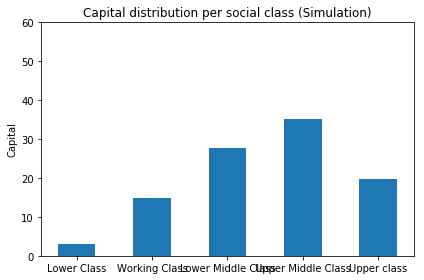

Income:
[ 3.60685866 17.54332042 32.38809354 26.961163   19.50056438]
Capital:
[ 2.92336124 14.31667082 31.78975533 29.25399279 21.71621981]
Population:
[17.95 32.5  33.4  14.65  1.55]
Capital:Population ratio
[ 0.16286135  0.44051295  0.95178908  1.99685958 14.01046439]


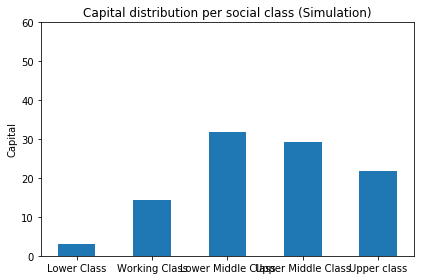

Income:
[ 4.81334394 17.38036787 33.43219905 28.23697775 16.13711139]
Capital:
[ 3.92188299 14.30665683 32.61451713 29.31294689 19.84399616]
Population:
[21.52 29.48 33.76 14.1   1.16]
Capital:Population ratio
[ 0.18224363  0.48530044  0.96606982  2.0789324  17.10689324]


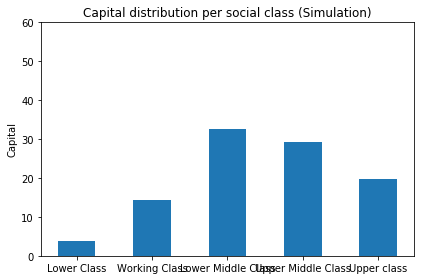

In [21]:
cap1 = plot_capital_to_class(population1,1000)
cap2 = plot_capital_to_class(population2,2000)
cap3 = plot_capital_to_class(population3,5000)

As we can see, the upper class despite it's size, has a substantial percentage of the capital of the population, which increases with the increase of the size of the population. This can be further proved by examining the capital to population ratio of each class which is proportionally larger for the upper class.

A good estimator to give also would be the gini coefficient of our population[5],which is defined as:



To do this we create a **gini_index** function that takes as input a numpy array and returns the single index of capital in our population.

In [22]:
def gini_index(capital):
    capital = capital.flatten()
    if np.amin(capital) < 0:
        # Values cannot be negative:
        capital -= np.amin(capital)
    # Values cannot be 0:
    capital += 0.0000001
    # Values must be sorted:
    capital = np.sort(capital)
    # Index per array element:
    index = np.arange(1,capital.shape[0]+1)
    # Number of array elements:
    n = capital.shape[0]
    # Gini coefficient:
    return ((np.sum((2 * index - n  - 1) * capital)) / (n * np.sum(capital)))

print gini_index(np.array(cap1))
print gini_index(np.array(cap2))
print gini_index(np.array(cap3))

0.19617587628517835
0.18205903508393706
0.12080484386107655


These numbers show that the population's we created have diminishing gini indexes as the population get bigger (and thus more representative of reality), making the model pretty unequal

## Simulation

Now that we have our unequal population we will simulate the one with 1000 people, to try to check how more unequal it will be in the future, if each dying parent passes his/her capital to his/her children.

The code that will perform the simulation is the following and it is programmed to run for as many years as we want.
In each year it will output the number of people in the population as well as the statistics provided before.

In [23]:
def marriage_query(person,partner):
    if(partner.marital_status == 0):
        if(partner.gender != person.gender):
            if(person.gender == 0):
                #if(partner.age in xrange((person.age/2) + 7, person.age + 8)):
                    if(partner.social_class <= person.social_class):
                        person_marital_status = get_marital_status(person.gender, person.age)
                        partner_marital_status = get_marital_status(partner.gender, partner.age)
                        if((person_marital_status) & (partner_marital_status)):
                            return 1
                    else:
                        return 0
                #else:
                #    return 0
            else:
                #if(partner.age in xrange((person.age) , person.age + 21)):
                    person_marital_status = get_marital_status(person.gender, person.age)
                    partner_marital_status = get_marital_status(partner.gender, partner.age)
                    if((person_marital_status) & (partner_marital_status)):
                        return 1
            #    else:
                    #return 0
        else:
            return 0
    else:
        return 0
    
# This function updates the people's classes after each iteration
def update_class(population):

    # Sort ascending based on capital
    population.sort(key=lambda x: x.capital)

    # Get classes
    T = len(population)
    l = int(0.2 * T)
    w = int(0.32 * T)
    lm = int(0.32 * T)
    um = int(0.15 * T)
    u = int(0.01 * T)

    # Set new social class
    for i, p in enumerate(population):
        if(i <= l):
            p.social_class = 1
        elif(i <= l+w):
            p.social_class = 2
        elif(i <= l+w+lm):
            p.social_class = 3
        elif(i <= l+w+lm+ um):
            p.social_class = 4
        else:
            p.social_class = 5
    return population


def run_simulation(population, years):
    for year in range(years):
        print len(population)
        for p in population:
            if(check_death(p) == 0):
                p.increment_age(1)
                # TODO:
                #Create a costs variable from data and initialize that too
                #Then adjust income and capital according to the already given data?! or make them interact?!
                #ADJUST Income
                
                if(p.age == 15):
                    p.income = get_income(p.social_class)
                else:
                    #p.update_income()
                    p.income += p.income * 0.01
                
                costs = 0
                p.update_capital(0)
                #If not married, run probability of him getting get_married
                if(p.marital_status == 0):
                    #Find a potential marriage partner
                    partners = [partner for partner in population if(marriage_query(p,partner))]
                    if(partners):
                        prtnr = random.choice(partners)
                        prtnr.get_married(p)
                        p.get_married(prtnr)
                #If married  run probability of giving birth
                if((p.marital_status == 1)):
                    for person in population:
                        if(person.id == p.husband_wife):
                            if(person.gender == 0):
                                husband = person
                                wife = p
                            else:
                                wife = person
                                husband = p
                            child_status = family.get_children_status(wife, husband)
                            if(child_status == 1):
                                child = family.create_child(husband, wife, 0)
                                husband.assign_child(child.id)
                                wife.assign_child(child.id)
                                child.assign_parents(husband.id, wife.id)
                                population.append(child)
                            break
            else:
                #If that person has children, then pass its capital to his/her kids
                    children = [child for child in population if (child.id in p.children_id) ]
                    no_of_children = len(children)
                    for c in children:
                        c.pass_capital(p.capital, no_of_children)
                    population = [person for person in population if p.id != person.id]
        population = update_class( population)
    cap = plot_capital_to_class(population,len(population))
    print gini_index(np.array(cap))

1007
1462
1881
2277
2650
3043
3404
3723
4028
4379
4688
4982
5263
5543
5820
6093
6358
6621
6856
7104
Income:
[ 1.96802942 20.26639224 34.34630328 30.3449897  13.07428536]
Capital:
[-2.49912499  9.9415439  33.48622741 41.4580972  17.61325647]
Population:
[20.01363327 31.99727335 31.99727335 14.99659168  0.99522836]
Capital:Population ratio
[-0.12487113  0.31069972  1.04653378  2.7645013  17.69770359]


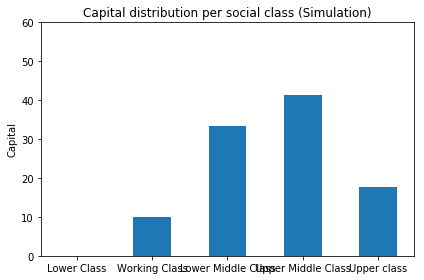

0.18507320299921423


In [24]:
run_simulation(population1, 20)


What we see from the above graph is that with the passage of time if capital keeps being passed from parents to children, then the distribution of capital between the social classes, is getting even more unequal with the top classes getting most of the spoils while the lower ones are almost non-existent.

## Can we do better?

Next goal of this simulation is to remove inheritance from the equation and see if the inequality persists.